In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.display.float_format = "{:.2f}".format

## Remove the limitation of displaying the Rows and Column

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

## 1. Import and Read

In [4]:
application_data = pd.read_csv(r"D:\Shreshth\projects\EDA Case Study\application_data.csv")

## 2. Inspect the dataframe

Inspecting the dataframe's columns, shapes, variable types etc

In [5]:
application_data.info()
application_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

In [6]:
application_data.shape

(307511, 122)

## 3. Data Cleaning

### 3.1 Calculated the percentage of Null values in each column and row. Rounded off the percentages upto two decimal places.

### Created a function for Calculating the percentage of Nullvalues across different columns

In [7]:
def isnull_percentage_func(x):
    return round(100*(x.isnull().sum()/len(x.index)),2)

### 3.2 Dropped all the columns with Null Values Greater than or equal to 47%

In [8]:
finding_null = pd.DataFrame({'Name':application_data.columns,'percentage_of_Null_Values':isnull_percentage_func(application_data)})
finding_null.set_index("Name").sort_values(by= 'percentage_of_Null_Values',ascending=False)

,percentage_of_Null_Values
Name,
COMMONAREA_MEDI,69.87
COMMONAREA_AVG,69.87
COMMONAREA_MODE,69.87
NONLIVINGAPARTMENTS_MODE,69.43
NONLIVINGAPARTMENTS_AVG,69.43
NONLIVINGAPARTMENTS_MEDI,69.43
FONDKAPREMONT_MODE,68.39
LIVINGAPARTMENTS_MODE,68.35
LIVINGAPARTMENTS_AVG,68.35


### 3.2.1 Created a new list for the columns which have null values >= 47% and then dropping those columnsm

In [9]:
columns_to_be_dropped = list(finding_null.loc[finding_null.percentage_of_Null_Values>=47]["Name"])

In [10]:
application_data = application_data.drop(columns_to_be_dropped ,axis=1)

In [11]:
isnull_percentage_func(application_data).sort_values(ascending=False)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
FLAG_MOBIL                     0.00
FLAG_WORK_PHONE                0.00
FLAG_EMP_PHONE                 0.00
DAYS_REGISTRATION              0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS                0.00
DAYS_ID_PUBLISH                0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_EMPLOYED                  0.00
AMT_INCOME_TOTAL               0.00
TARGET                      

### 3.3 Dropped the columns as that are not relevant to the analysis

In [12]:
application_data = application_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE'],axis=1)

In [13]:
application_data.info()
application_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
SK_ID_CURR                   307511 non-null int64
TARGET                       307511 non-null int64
NAME_CONTRACT_TYPE           307511 non-null object
CODE_GENDER                  307511 non-null object
FLAG_OWN_CAR                 307511 non-null object
FLAG_OWN_REALTY              307511 non-null object
CNT_CHILDREN                 307511 non-null int64
AMT_INCOME_TOTAL             307511 non-null float64
AMT_CREDIT                   307511 non-null float64
AMT_ANNUITY                  307499 non-null float64
AMT_GOODS_PRICE              307233 non-null float64
NAME_INCOME_TYPE             307511 non-null object
NAME_EDUCATION_TYPE          307511 non-null object
NAME_FAMILY_STATUS           307511 non-null object
NAME_HOUSING_TYPE            307511 non-null object
DAYS_BIRTH                   307511 non-null int64
DAYS_EMPLOYED                307511 non-null int64
DAYS_I

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,-16037.00,63815.05,-2994.20,1.00,2.15,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.27,0.27
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,4363.99,141275.77,1509.45,0.00,0.91,0.01,0.45,0.01,0.12,0.28,0.01,0.27,0.06,0.00,0.06,0.00,0.06,0.05,0.03,0.10,0.02,0.09,0.02,0.02,0.02,0.92,0.79
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,-25229.00,-17912.00,-7197.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,112500.00,270000.00,16524.00,238500.00,-19682.00,-2760.00,-4299.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,147150.00,513531.00,24903.00,450000.00,-15750.00,-1213.00,-3254.00,1.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,367142.50,0.00,1.00,202500.00,808650.00,34596.00,679500.00,-12413.00,-289.00,-1720.00,1.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,-7489.00,365243.00,0.00,1.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,27.00,261.00


In [14]:
isnull_percentage_func(application_data).sort_values(ascending=False)

OCCUPATION_TYPE             31.35
AMT_REQ_CREDIT_BUREAU_QRT   13.50
AMT_REQ_CREDIT_BUREAU_MON   13.50
AMT_GOODS_PRICE              0.09
CODE_GENDER                  0.00
FLAG_OWN_CAR                 0.00
TARGET                       0.00
FLAG_MOBIL                   0.00
DAYS_ID_PUBLISH              0.00
DAYS_EMPLOYED                0.00
DAYS_BIRTH                   0.00
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
NAME_CONTRACT_TYPE           0.00
AMT_ANNUITY                  0.00
AMT_CREDIT                   0.00
AMT_INCOME_TOTAL             0.00
CNT_CHILDREN                 0.00
FLAG_OWN_REALTY              0.00
CNT_FAM_MEMBERS              0.00
ORGANIZATION_TYPE            0.00
FLAG_DOCUMENT_2              0.00
FLAG_DOCUMENT_13             0.00
FLAG_DOCUMENT_21             0.00
FLAG_DOCUMENT_20             0.00
FLAG_DOCUMENT_19             0.00
FLAG_DOCUMENT_18             0.00
FLAG_DOCUMENT_

### 3.4 As there are 20 columns for 20 different documents. So combining all the documents and adding them to a new column by aggregating them.

In [15]:
application_data['AGGREGATE_DOC_RESULT'] = application_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].mean(axis=1)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-2120,1,Laborers,1.00,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.05
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,-16765,-1188,-291,1,Core staff,2.00,School,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.05
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-2531,1,Laborers,1.00,Government,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-2437,1,Laborers,2.00,Business Entity Type 3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,0.05
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-3458,1,Core staff,1.00,Religion,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.05


In [16]:
application_data.drop(application_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'],inplace=True,axis=1)
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-2120,1,Laborers,1.00,Business Entity Type 3,0.00,0.00,0.05
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,-16765,-1188,-291,1,Core staff,2.00,School,0.00,0.00,0.05
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-2531,1,Laborers,1.00,Government,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-2437,1,Laborers,2.00,Business Entity Type 3,nan,nan,0.05
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-3458,1,Core staff,1.00,Religion,0.00,0.00,0.05


In [17]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
SK_ID_CURR                   307511 non-null int64
TARGET                       307511 non-null int64
NAME_CONTRACT_TYPE           307511 non-null object
CODE_GENDER                  307511 non-null object
FLAG_OWN_CAR                 307511 non-null object
FLAG_OWN_REALTY              307511 non-null object
CNT_CHILDREN                 307511 non-null int64
AMT_INCOME_TOTAL             307511 non-null float64
AMT_CREDIT                   307511 non-null float64
AMT_ANNUITY                  307499 non-null float64
AMT_GOODS_PRICE              307233 non-null float64
NAME_INCOME_TYPE             307511 non-null object
NAME_EDUCATION_TYPE          307511 non-null object
NAME_FAMILY_STATUS           307511 non-null object
NAME_HOUSING_TYPE            307511 non-null object
DAYS_BIRTH                   307511 non-null int64
DAYS_EMPLOYED                307511 non-null int64
DAYS_I

In [18]:
application_data.shape

(307511, 25)

### 3.5 The data for columns 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_GOODS_PRICE' are less than 13%

for columns 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON' the suitable metrics to replace the null values is mode as these columns are categorical

for column 'AMT_GOODS_PRICE' the suitable metrics to replace the null values is median as it is continous variable and gives a better insight than mean

In [19]:
application_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE              96391
AMT_REQ_CREDIT_BUREAU_MON    41519
AMT_REQ_CREDIT_BUREAU_QRT    41519
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
AGGREGATE_DOC_RESULT             0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
ORGANIZATION_TYPE                0
SK_ID_CURR                       0
dtype: int64

for column 'AMT_ANNUITY','CNT_FAM_MEMBERS' the Null values are very less, so we dropped the rows from the dataframe

In [20]:
application_data.dropna(subset=["AMT_ANNUITY", "CNT_FAM_MEMBERS"], inplace=True)

In [21]:
application_data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE              96391
AMT_REQ_CREDIT_BUREAU_MON    41517
AMT_REQ_CREDIT_BUREAU_QRT    41517
AMT_GOODS_PRICE                276
AGGREGATE_DOC_RESULT             0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
CNT_FAM_MEMBERS                  0
ORGANIZATION_TYPE                0
SK_ID_CURR                       0
dtype: int64

### 3.6 Checked if the all the columns have appropriate data type

In [22]:
application_data.dtypes

SK_ID_CURR                     int64
TARGET                         int64
NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
CNT_CHILDREN                   int64
AMT_INCOME_TOTAL             float64
AMT_CREDIT                   float64
AMT_ANNUITY                  float64
AMT_GOODS_PRICE              float64
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
DAYS_BIRTH                     int64
DAYS_EMPLOYED                  int64
DAYS_ID_PUBLISH                int64
FLAG_MOBIL                     int64
OCCUPATION_TYPE               object
CNT_FAM_MEMBERS              float64
ORGANIZATION_TYPE             object
AMT_REQ_CREDIT_BUREAU_MON    float64
AMT_REQ_CREDIT_BUREAU_QRT    float64
AGGREGATE_DOC_RESULT         float64
dtype: object

In [23]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-2120,1,Laborers,1.00,Business Entity Type 3,0.00,0.00,0.05
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,-16765,-1188,-291,1,Core staff,2.00,School,0.00,0.00,0.05
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-2531,1,Laborers,1.00,Government,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-2437,1,Laborers,2.00,Business Entity Type 3,nan,nan,0.05
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-3458,1,Core staff,1.00,Religion,0.00,0.00,0.05


In [24]:
application_data.nunique()

SK_ID_CURR                   307497
TARGET                            2
NAME_CONTRACT_TYPE                2
CODE_GENDER                       3
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
CNT_CHILDREN                     15
AMT_INCOME_TOTAL               2548
AMT_CREDIT                     5603
AMT_ANNUITY                   13672
AMT_GOODS_PRICE                1002
NAME_INCOME_TYPE                  8
NAME_EDUCATION_TYPE               5
NAME_FAMILY_STATUS                5
NAME_HOUSING_TYPE                 6
DAYS_BIRTH                    17460
DAYS_EMPLOYED                 12574
DAYS_ID_PUBLISH                6168
FLAG_MOBIL                        2
OCCUPATION_TYPE                  18
CNT_FAM_MEMBERS                  17
ORGANIZATION_TYPE                58
AMT_REQ_CREDIT_BUREAU_MON        24
AMT_REQ_CREDIT_BUREAU_QRT        11
AGGREGATE_DOC_RESULT              5
dtype: int64

### 3.6.1 Converted to the appropriate Data type for the required columns.

In [25]:
application_data["CNT_FAM_MEMBERS"]=application_data["CNT_FAM_MEMBERS"].astype("int64")

In [26]:
application_data["AMT_REQ_CREDIT_BUREAU_MON"] = application_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(-1)
application_data["AMT_REQ_CREDIT_BUREAU_MON"] = application_data["AMT_REQ_CREDIT_BUREAU_MON"].astype("int64")
application_data["AMT_REQ_CREDIT_BUREAU_MON"] = application_data["AMT_REQ_CREDIT_BUREAU_MON"].astype("str")
application_data["AMT_REQ_CREDIT_BUREAU_MON"] = application_data["AMT_REQ_CREDIT_BUREAU_MON"].replace('-1',np.nan)

In [27]:
application_data["AMT_REQ_CREDIT_BUREAU_QRT"] = application_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(-1)
application_data["AMT_REQ_CREDIT_BUREAU_QRT"] = application_data["AMT_REQ_CREDIT_BUREAU_QRT"].astype("int64")
application_data["AMT_REQ_CREDIT_BUREAU_QRT"] = application_data["AMT_REQ_CREDIT_BUREAU_QRT"].astype("str")
application_data["AMT_REQ_CREDIT_BUREAU_QRT"] = application_data["AMT_REQ_CREDIT_BUREAU_QRT"].replace('-1',np.nan)

In [28]:
application_data.dtypes

SK_ID_CURR                     int64
TARGET                         int64
NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
CNT_CHILDREN                   int64
AMT_INCOME_TOTAL             float64
AMT_CREDIT                   float64
AMT_ANNUITY                  float64
AMT_GOODS_PRICE              float64
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
DAYS_BIRTH                     int64
DAYS_EMPLOYED                  int64
DAYS_ID_PUBLISH                int64
FLAG_MOBIL                     int64
OCCUPATION_TYPE               object
CNT_FAM_MEMBERS                int64
ORGANIZATION_TYPE             object
AMT_REQ_CREDIT_BUREAU_MON     object
AMT_REQ_CREDIT_BUREAU_QRT     object
AGGREGATE_DOC_RESULT         float64
dtype: object

### 3.7 Converted the Negative days into years

In [29]:
application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH"]] = application_data[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH"]].apply(lambda x: abs(round((x/365),2)))

In [30]:
application_data.rename(columns = {'DAYS_BIRTH':'YEARS_BIRTH', 'DAYS_EMPLOYED':'YEARS_EMPLOYED', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace = True)

In [31]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,0.05
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,6.68,1,Laborers,2,Business Entity Type 3,NaN,NaN,0.05
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,9.47,1,Core staff,1,Religion,0,0,0.05


## 4. Handling Outliers

In [32]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,AGGREGATE_DOC_RESULT
count,307497.00,307497.00,307497.00,307497.00,307497.00,307497.00,307221.00,307497.00,307497.00,307497.00,307497.00,307497.00,307497.00
mean,278182.23,0.08,0.42,168796.21,599027.09,27108.55,538397.35,43.94,185.56,8.20,1.00,2.15,0.05
std,102790.41,0.27,0.72,237127.59,402493.95,14493.78,369448.37,11.96,382.05,4.14,0.00,0.91,0.02
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,20.52,0.00,0.00,0.00,1.00,0.00
25%,189150.00,0.00,0.00,112500.00,270000.00,16524.00,238500.00,34.01,2.56,4.71,1.00,2.00,0.05
50%,278204.00,0.00,0.00,146812.50,513531.00,24903.00,450000.00,43.15,6.08,8.92,1.00,2.00,0.05
75%,367144.00,0.00,1.00,202500.00,808650.00,34596.00,679500.00,53.92,15.64,11.78,1.00,3.00,0.05
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,69.12,1000.67,19.72,1.00,20.00,0.20


### 4.1 Calculated Outliers For CNT_CHILDREN

In [33]:
application_data['CNT_CHILDREN'].value_counts().sort_index(ascending=False)

19         2
14         3
12         2
11         1
10         2
9          2
8          2
7          7
6         21
5         84
4        429
3       3717
2      26749
1      61119
0     215357
Name: CNT_CHILDREN, dtype: int64

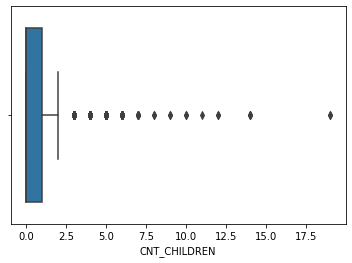

In [34]:
sns.boxplot(application_data['CNT_CHILDREN'])
plt.show()

It seems 14 and 19 are outliers for Children count as the graph was continous till 12. The values should be replaced with mode of the column i.e. 0

### 4.2 Outliers for AMT_INCOME_TOTAL

In [35]:
application_data['AMT_INCOME_TOTAL'].describe()

count      307497.00
mean       168796.21
std        237127.59
min         25650.00
25%        112500.00
50%        146812.50
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

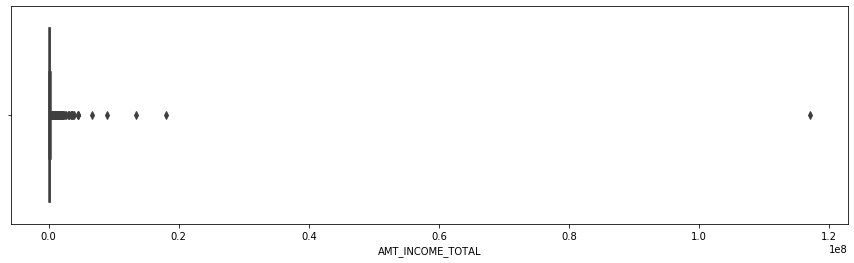

In [36]:
plt.figure(figsize=[15,4])
sns.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.show()

In [37]:
application_data.AMT_INCOME_TOTAL.quantile([0.5,0.75,0.8,0.95,0.99,0.995,0.999,0.9999,1])

0.50      146812.50
0.75      202500.00
0.80      225000.00
0.95      337500.00
0.99      472500.00
0.99      630000.00
1.00      900000.00
1.00     2250000.00
1.00   117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

For the coulmn AMT_INCOME_TOTAL all the values above 20000000 are the outliers. So it should be replaced with the median of the column i.e. 146812.5

### 4.3 Outliers for AMT_CREDIT

In [38]:
application_data['AMT_CREDIT'].describe()

count    307497.00
mean     599027.09
std      402493.95
min       45000.00
25%      270000.00
50%      513531.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

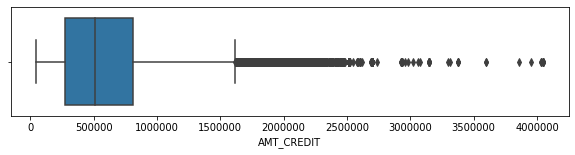

In [39]:
plt.figure(figsize=[10,2])
sns.boxplot(application_data['AMT_CREDIT'])
plt.show()

In [40]:
application_data['AMT_CREDIT'].quantile(([0.5,0.7,0.9,0.95,0.99,0.995,0.999,0.9999]))

0.50    513531.00
0.70    755190.00
0.90   1133748.00
0.95   1350000.00
0.99   1854020.16
0.99   2022565.50
1.00   2517300.00
1.00   3030585.70
Name: AMT_CREDIT, dtype: float64

For column AMT_CREDIT, all the values above 3500000 are considered as Outliers. So those values should be replaced with Median = 513531.0

### 4.4 Outliers for AMT_GOODS_PRICE

In [41]:
application_data['AMT_GOODS_PRICE'].describe()

count    307221.00
mean     538397.35
std      369448.37
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

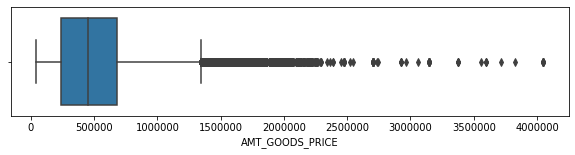

In [42]:
plt.figure(figsize=[10,2])
sns.boxplot(application_data['AMT_GOODS_PRICE'])
plt.show()

In [43]:
application_data['AMT_GOODS_PRICE'].quantile(([0.5,0.7,0.8,0.85,0.9,0.95,0.99,0.999]))

0.50    450000.00
0.70    675000.00
0.80    814500.00
0.85    900000.00
0.90   1093500.00
0.95   1305000.00
0.99   1800000.00
1.00   2250000.00
Name: AMT_GOODS_PRICE, dtype: float64

For column AMT_GOODS_PRICE, all the values above 2800000 are considered as Outliers. So those values should be replaced with Median = 450000

### 4.5 Outliers for AMT_REQ_CREDIT_BUREA_QRT

In [44]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count     265980
unique        11
top            0
freq      215408
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: object

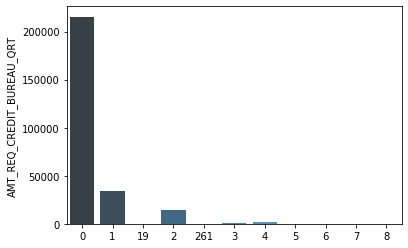

In [45]:
label = np.array(pd.Series(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].unique()).dropna())
sns.barplot(x = label , y = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(), palette="Blues_d")
plt.show()

In [46]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].unique()

array(['0', nan, '1', '2', '4', '3', '8', '5', '6', '7', '261', '19'],
      dtype=object)

In [47]:
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]

'0'

For column AMT_REQ_CREDIT_BUREAU_QRT, the values '19' and '261' are considered as Outliers. So those values should be replaced with Mode of the column = 0

### 4.6 Outliers for YEARS_EMPLOYED

In [48]:
application_data['YEARS_EMPLOYED'].describe()

count   307497.00
mean       185.56
std        382.05
min          0.00
25%          2.56
50%          6.08
75%         15.64
max       1000.67
Name: YEARS_EMPLOYED, dtype: float64

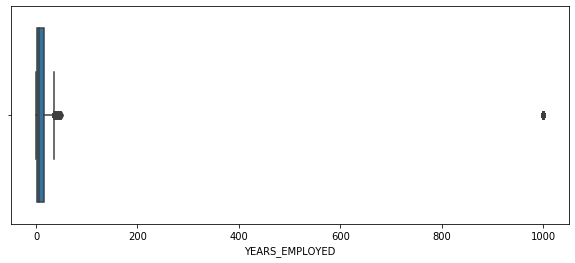

In [49]:
plt.figure(figsize=[10,4])
sns.boxplot(application_data['YEARS_EMPLOYED'])
plt.show()

In [50]:
application_data['YEARS_EMPLOYED'].quantile(([0.5,0.7,0.8,0.85,0.9,0.95,0.99,0.999]))

0.50      6.08
0.70     12.15
0.80     25.18
0.85   1000.67
0.90   1000.67
0.95   1000.67
0.99   1000.67
1.00   1000.67
Name: YEARS_EMPLOYED, dtype: float64

In [51]:
application_data[application_data['YEARS_EMPLOYED']>60].shape

(55374, 25)

For the column YEARS_EMPLOYED, the YEARS_EMPLOYED above 60 years are considered to be the Outliers. So it should be replaced by the median of the column = 6.08 years

In [52]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,0.05
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,6.68,1,Laborers,2,Business Entity Type 3,NaN,NaN,0.05
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,9.47,1,Core staff,1,Religion,0,0,0.05


## 5. Binning 

### 5.1 For 'AMT_INCOME_TOTAL'

In [53]:
application_data['IncomeSlab'] = pd.cut(application_data.AMT_INCOME_TOTAL,[20000, 300000, 1200000, 2000000, 100000000], labels = ['Low', 'Medium', 'High','Very High'])

### 5.2 For 'YEARS_BIRTH'

In [54]:
application_data['Applicant_AgeGroup'] = pd.cut(application_data.YEARS_BIRTH,[0,20,30,40,50,60,9999],labels=['0-20','20-30', '30-40', '40-50', '50-60', '60+'])

### 5.3 For 'YEARS_EMPLOYED'

In [55]:
application_data['Experience_Slab'] = pd.cut(application_data.YEARS_EMPLOYED,[0,10,20,30,40,50,9999],labels=['0-10','10-20','20-30', '30-40', '40-50', '50+'])

In [56]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT,IncomeSlab,Applicant_AgeGroup,Experience_Slab
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,0.05,Low,20-30,0-10
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05,Low,40-50,0-10
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0.00,Low,50-60,0-10
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,6.68,1,Laborers,2,Business Entity Type 3,NaN,NaN,0.05,Low,50-60,0-10
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,9.47,1,Core staff,1,Religion,0,0,0.05,Low,50-60,0-10


## 6. Data Imbalance for 'TARGET'

In [57]:
application_data.TARGET.value_counts(normalize=True)*100

0   91.93
1    8.07
Name: TARGET, dtype: float64

The applicants who are applying for the loan are more likely to pay on time than those who default by 91.93%

## 7. Dividing the dataset on the 'TARGET' column

In [58]:
target_1 = application_data[application_data['TARGET']==1]
target_0 = application_data[application_data['TARGET']==0]

## 8. Univariate Analysis

### 8.1  Categorical variable with respect to 'TARGET'

In [59]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT,IncomeSlab,Applicant_AgeGroup,Experience_Slab
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,0.05,Low,20-30,0-10
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05,Low,40-50,0-10
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0.00,Low,50-60,0-10
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,52.07,8.33,6.68,1,Laborers,2,Business Entity Type 3,NaN,NaN,0.05,Low,50-60,0-10
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,54.61,8.32,9.47,1,Core staff,1,Religion,0,0,0.05,Low,50-60,0-10


 ### Created a function for Barplot for Univariate analysis

In [60]:
def plot_p_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Count of loans': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Count of loans",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

### 8.1.1 Gender of the Applicants

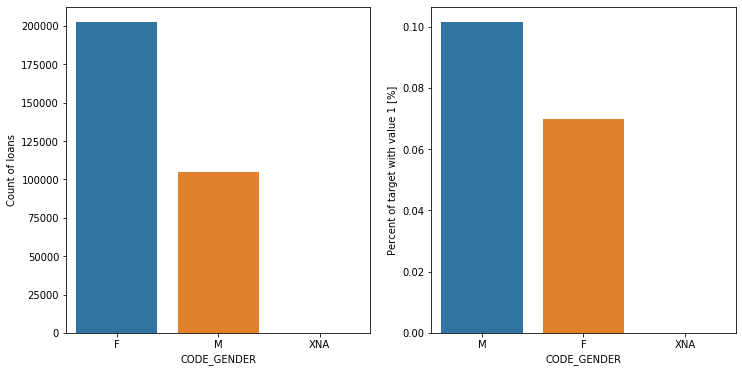

In [61]:
plot_p_stats('CODE_GENDER')

Females takes more loan than Males, which is almost Double.

Whereas looking at the percentage of Default, Males have higher chances of being defaulter by almost 10%

### 8.1.2 Education of the Applicants

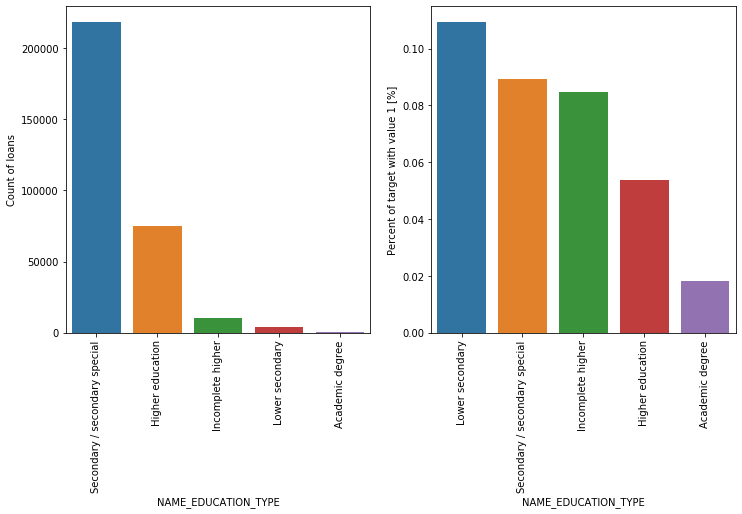

In [62]:
plot_p_stats('NAME_EDUCATION_TYPE',True,True)

Applicants with Secondary Education are the highest to take loans with count of more than 200000 loans.Followed by Higher education. The least are applicants with Academic Degree.

The applicants with lower Education are highest (approx 11%) to default their loans although they are very less likely to loans. Whereas, applicants with Academic degree are make least default (by less than 2%)


### 8.1.3 Experience of the Applicants

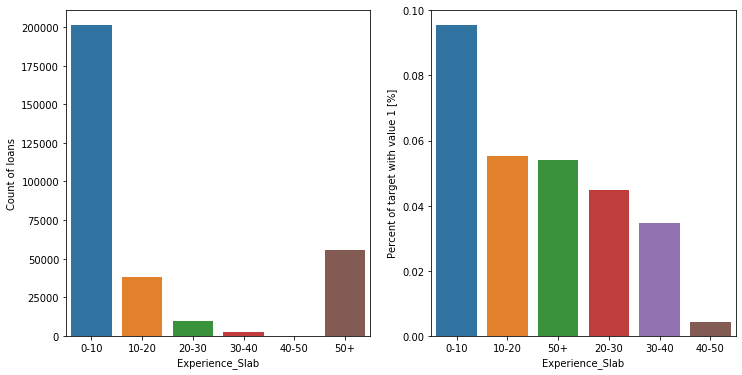

In [63]:
plot_p_stats('Experience_Slab')

Applicants in bracket of 0-10 years of experience are the highest to take the loan, approximately 4 times of the Applicants with experince of 50+ years. Applicants with 40-50 years of experience are the least to take the loan.

Also, applicants in bracket of 0-10 years of experience are the highest to default the loan by approx 9.5%.
Applicants with 10-20 and 50+ years of experience are defaulting almost by same percentage (approx 5.8%).
Applicants with 40-50 years of experience are the least to default the loan.

### 8.1.3 Age Group of Applicants

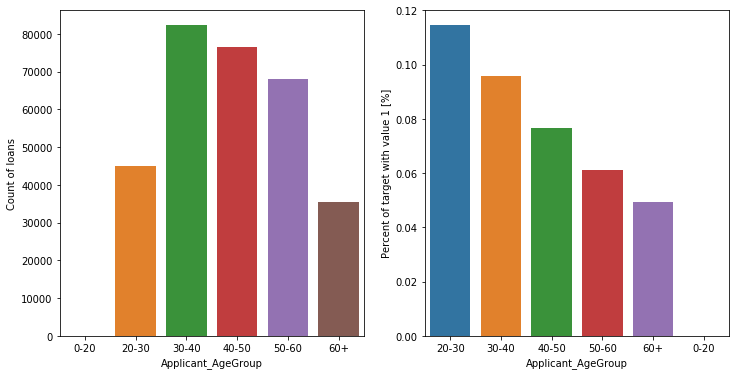

In [64]:
plot_p_stats('Applicant_AgeGroup')

Applicants aging between 30-40 years have taken maximum loan, followed by applicant within 40-50, 50-60 and 20-30 years of age. 
Applicants with age of less than 20 years haven’t took any loan.

Applicants with 20-30 years of age are more likely to default on loan, followed by 30-40,40-50,50-60 and 60+ of age bracket. The trend show that as age increases, the person is less likely to default on loan.

### 8.1.4 Loan Type

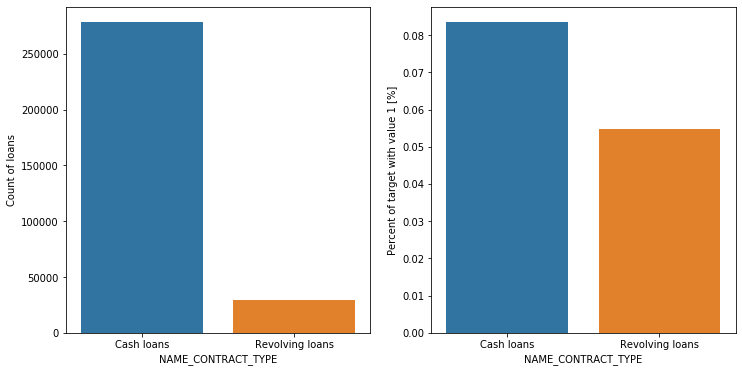

In [65]:
plot_p_stats('NAME_CONTRACT_TYPE')

Applicants prefer to take Cash loans than the Revolving loans by almost 11 times.

Applicants are more likely to default in Cash loans than Revolving loan.

### 8.1.5 Family Status of Applicants

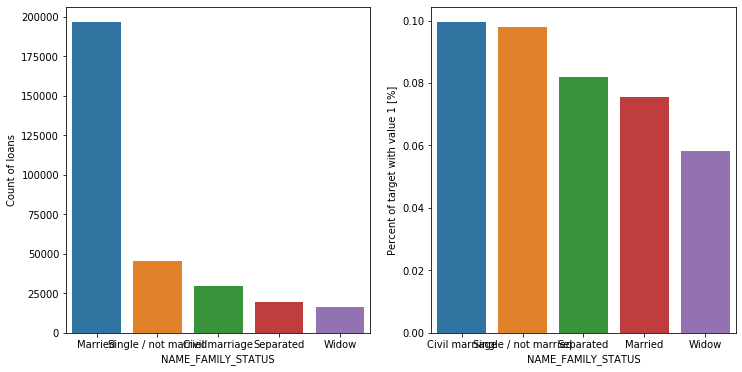

In [66]:

plot_p_stats('NAME_FAMILY_STATUS')

Applicants who are taking loan are mostly married followed by Single/not married and civil marriage.

Applicants with Civil marriage have the highest percent for loan defaulting (by 10%), with Widow the being lowest.

### 8.1.6 Income Slab of Applicants

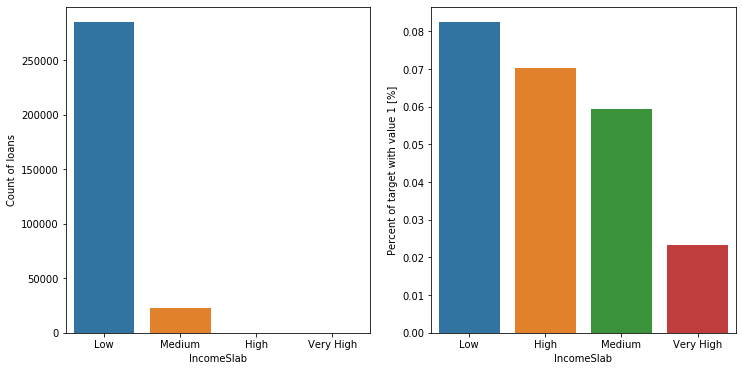

In [67]:
plot_p_stats('IncomeSlab')

In [68]:
(application_data['IncomeSlab'] == ' Very High').value_counts()

False    307497
Name: IncomeSlab, dtype: int64

In [69]:
(application_data['IncomeSlab'] == 'High').value_counts()

False    307383
True        114
Name: IncomeSlab, dtype: int64

Applicants having Low Income are the highest to take the loans exceeding more than 250000 loans, whereas Applicants with Very High income do not take any loans and applicants with High income take very less loans which is negligible in comparision to applicants with Low Income.

Applicants with low income are highest to default the loan (approx. 8%), followed by High (approx. 7%), Medium (approx. 6%) and Very High incomes (approx. 2%).

### 8.1.7 Family Count of the Applicants

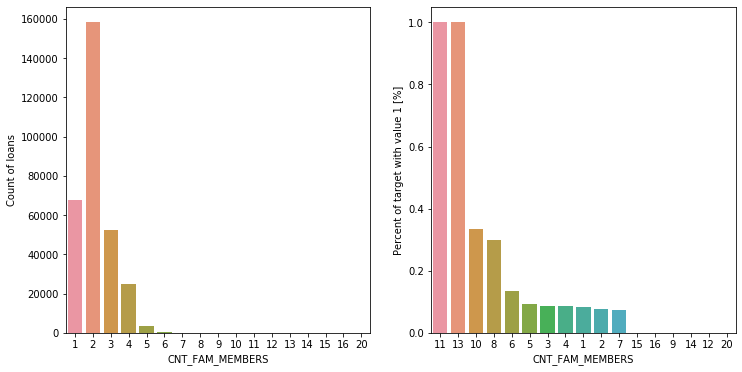

In [70]:
plot_p_stats('CNT_FAM_MEMBERS')

Applicants having only 2 family members have taken maximum loan, followed by 1 (single person), 3 (having two members) and 4 to take loans.

Applicants with family size of 11 and 13 are 100% at default to repay loan. Other families with 10 or 8 members having default percentage over 30%. Families with 6 or less members have loan default rate close to the 10% average.

## 8.2 Univariate Analysis for Continous variables

### 8.2.1 Annuity Amount 

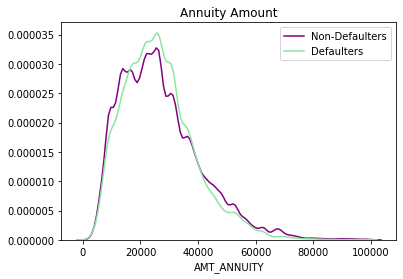

In [71]:
sns.distplot(target_0[target_0['AMT_ANNUITY'] < 100000].AMT_ANNUITY, hist=False, color= 'purple', label = "Non-Defaulters")
sns.distplot(target_1[target_1['AMT_ANNUITY'] < 100000].AMT_ANNUITY, hist=False, color='g', label = "Defaulters")
plt.title("Annuity Amount")
plt.show()

The density Annuity Amount for both applicants who pay on time and who are likely to default is almost same. However, it could be said that applicants who default have higher Annuity Amount. Moreover, for the annuity amount between 20000-40000 are showing a trend to default the loan.

### 8.2.2 Amount Good Price

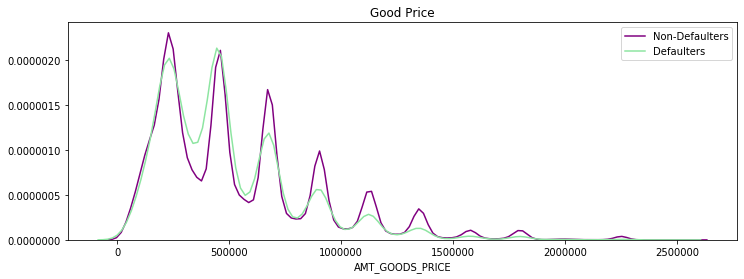

In [72]:
plt.figure(figsize=[12,4])
sns.distplot(target_0[target_0['AMT_GOODS_PRICE'] < 2700000].AMT_GOODS_PRICE, hist=False, color= 'purple', label = "Non-Defaulters")
sns.distplot(target_1[target_1['AMT_GOODS_PRICE'] < 2700000].AMT_GOODS_PRICE, hist=False, color= 'g', label = "Defaulters")
# axes = plt.axes()
# axes.set_xticks([0,50000, 100000, 150000,200000,250000,300000,350000,400000,450000, 500000, 1000000, 1500000])
plt.title("Good Price")
plt.show()

In comparison with defaulters, non-defaulters have higher values for Goods Price.  Athough The Goods Price is overlapping for both applicants who likely to pay on time and applicants who default the loan.

Higher the Amount of loan, applicants are less likely to take the loans.

### 8.2.3 Credit Distribution

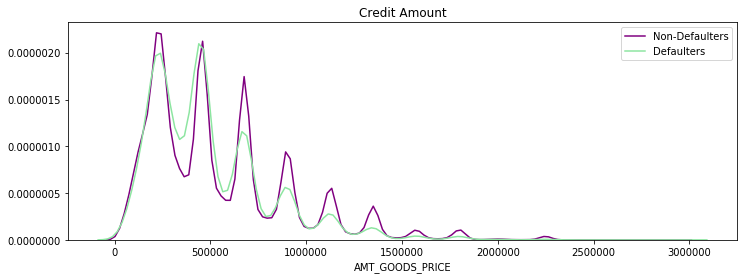

In [73]:
plt.figure(figsize=[12,4])
sns.distplot(target_0[target_0['AMT_CREDIT'] < 3000000].AMT_GOODS_PRICE, hist=False, color= 'purple',label = "Non-Defaulters")
sns.distplot(target_1[target_1['AMT_CREDIT'] < 3000000].AMT_GOODS_PRICE, hist=False, color= 'g',label = "Defaulters")
# axes = plt.axes()
# axes.set_xticks([0,50000, 100000, 150000,200000,250000,300000,350000,400000,450000, 500000, 1000000, 1500000])
plt.title("Credit Amount")
plt.show()

In comparision with defaulters, non-defaulters have higher values for Credit Amount.  Athough The Credit Amount seems overlapping for both applicants who likely to pay on time and applicants who default the loan.

## 9. Calculated Correlation for Continuous Variables

In [74]:
corr = target_0.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr0 = corr.unstack().reset_index()
corr0.columns = ['VAR1','VAR2','Correlation']
corr0.dropna(subset=['Correlation'],inplace=True)
corr0['Correlation'] = round(corr0['Correlation'],2)
corr0['Correlation'] = corr0['Correlation'].abs()
corr0.sort_values(by='Correlation',ascending=False).head(10)

,VAR1,VAR2,Correlation
82,AMT_GOODS_PRICE,AMT_CREDIT,0.99
145,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
69,AMT_ANNUITY,AMT_CREDIT,0.77
111,YEARS_EMPLOYED,YEARS_BIRTH,0.63
68,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
81,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
55,AMT_CREDIT,AMT_INCOME_TOTAL,0.34
93,YEARS_BIRTH,CNT_CHILDREN,0.34
150,CNT_FAM_MEMBERS,YEARS_BIRTH,0.29


It seems, For consumers who pay their loan on time, the price of the goods for which the loan is given and Credit amount of the loan are highly correlated (99%). Followed by Number of children they have and the size of the family.

Amount Credited and the total income of the applicants are not significantly correlated.

In [75]:
corr_1 = target_1.corr()
corr_1 = corr_1.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr1 = corr_1.unstack().reset_index()
corr1.columns = ['VAR1','VAR2','Correlation']
corr1.dropna(subset=['Correlation'],inplace=True)
corr1['Correlation'] = round(corr1['Correlation'],2)
corr1['Correlation'] = corr1['Correlation'].abs()
corr1.sort_values(by='Correlation',ascending=False).head(10)

,VAR1,VAR2,Correlation
82,AMT_GOODS_PRICE,AMT_CREDIT,0.98
145,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
69,AMT_ANNUITY,AMT_CREDIT,0.75
83,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
111,YEARS_EMPLOYED,YEARS_BIRTH,0.58
93,YEARS_BIRTH,CNT_CHILDREN,0.26
124,YEARS_ID_PUBLISH,YEARS_BIRTH,0.25
125,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.23
150,CNT_FAM_MEMBERS,YEARS_BIRTH,0.20
161,AGGREGATE_DOC_RESULT,AMT_ANNUITY,0.20


It seems, for defaulters, the price of the goods for which the loan is given and Credit amount of the loan are highly correlated (98%). Followed by Number of children they have and the size of the family.

Annuity amount and the aggregate of all the documents needed to take loan are least correlated.

## 10. Bivariate Analysis 

## 10.1 Continuous to Continuous variables


### 10.1.1 Income vs Good Price

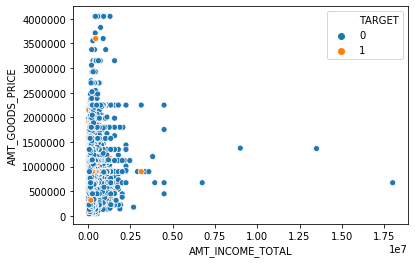

In [76]:
sns.scatterplot(x=application_data[application_data['AMT_INCOME_TOTAL'] < 30000000].AMT_INCOME_TOTAL, y= 'AMT_GOODS_PRICE', hue= 'TARGET', data= application_data)
plt.show()


The Good Price and Income of the appicants are have a weak correlation between them. Also, the dataset contains a lot of outliers.

## 10.2 Continuous vs Categorical variables

### 10.2.1 Contract Type vs Amount Good Price

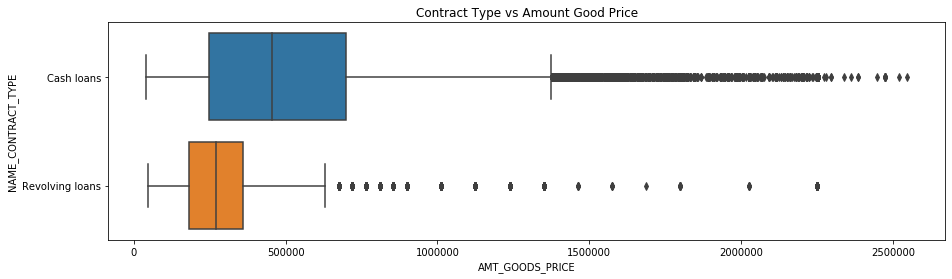

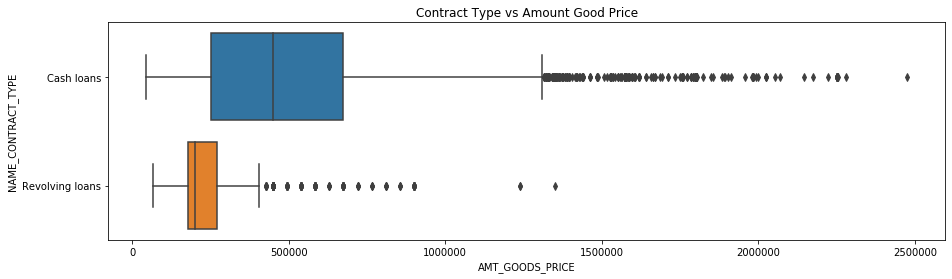

In [77]:
plt.figure(figsize=[15,4])
sns.boxplot(x = application_data[application_data['AMT_GOODS_PRICE'] < 2700000].AMT_GOODS_PRICE, y='NAME_CONTRACT_TYPE', data= application_data)
plt.title("Contract Type vs Amount Good Price")

plt.figure(figsize=[15,4])
sns.boxplot(x =target_1[target_1['AMT_GOODS_PRICE'] < 2700000].AMT_GOODS_PRICE, y='NAME_CONTRACT_TYPE', data= target_1)
plt.title("Contract Type vs Amount Good Price")
plt.show()

Maximum applicants opt for cash loans, out of which Applicants who default the loan, generally have a loan of price close to 500000. Revolving loan is taken by very less number applicants. For Revolving loan, the default applicants are defaulting the loan of price 200000.

### 10.2.2 Income of Applicants vs Experience Slab

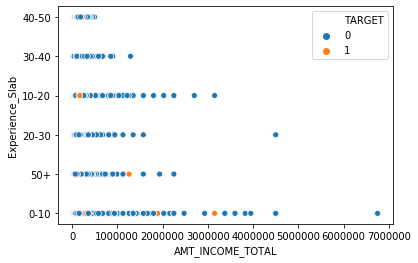

In [78]:
sns.scatterplot(x=application_data[application_data['AMT_INCOME_TOTAL'] < 7500000].AMT_INCOME_TOTAL, y= 'Experience_Slab', hue= 'TARGET', data= application_data)
plt.show()

the Applicants with 0-10 years of experience have their total income between 0 - 2000000 are more likely to default the loan. Followed by Applicants with 10-20  and 50+ years of experience. Appliacnts with 30-40 years of experience are least like to default as their income is stable.

## 10.3 Categorical to Categorical

### 10.3.1 Own a Car vs Own a House

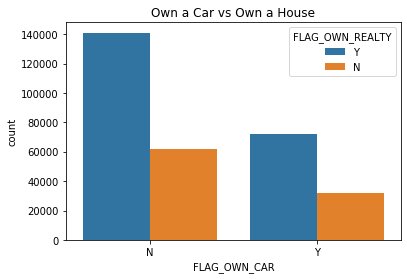

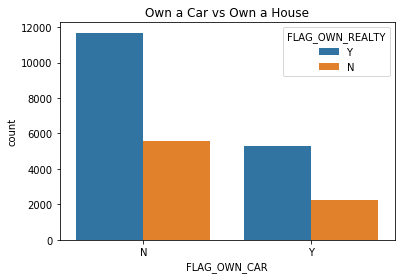

In [79]:
sns.countplot(x = 'FLAG_OWN_CAR', hue='FLAG_OWN_REALTY', data= application_data)
plt.title("Own a Car vs Own a House")
plt.show()

sns.countplot(x = 'FLAG_OWN_CAR', hue='FLAG_OWN_REALTY', data= target_1)
plt.title("Own a Car vs Own a House")
plt.show()

The applicants who owns a car and a house are less likely to default. Applicants who own a house but don't have a car are more likely to default.

## 11. Importing the previous_data 

In [80]:
previous_data = pd.read_csv(r"D:\Shreshth\projects\EDA Case Study\previous_application.csv")

In [81]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


## 11.1 Inspect the dataframe

In [82]:
previous_data.info()
previous_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

(1670214, 37)

In [83]:
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


## 12. Data Quality check and missing values

### 12.1 Dropped all the columns with Null Values Greater than or equal to 50%

In [84]:
def isnull_percentage_func(x):
    return round(100*(x.isnull().sum()/len(x.index)),2)

In [85]:
finding_null1 = pd.DataFrame({'Name':previous_data.columns,'percentage_of_Null_Values':isnull_percentage_func(previous_data)})
finding_null1.set_index("Name")

,percentage_of_Null_Values
Name,
SK_ID_PREV,0.00
SK_ID_CURR,0.00
NAME_CONTRACT_TYPE,0.00
AMT_ANNUITY,22.29
AMT_APPLICATION,0.00
AMT_CREDIT,0.00
AMT_DOWN_PAYMENT,53.64
AMT_GOODS_PRICE,23.08
WEEKDAY_APPR_PROCESS_START,0.00


In [86]:
HighValue1 = list(finding_null1.loc[finding_null1.percentage_of_Null_Values>=49]["Name"])
HighValue1

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [87]:
previous_data= previous_data.drop(HighValue1,axis=1)

In [88]:
isnull_percentage_func(previous_data).sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_LAST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_FIRST_DUE                40.30
DAYS_FIRST_DRAWING            40.30
DAYS_TERMINATION              40.30
AMT_GOODS_PRICE               23.08
CNT_PAYMENT                   22.29
AMT_ANNUITY                   22.29
PRODUCT_COMBINATION            0.02
FLAG_LAST_APPL_PER_CONTRACT    0.00
HOUR_APPR_PROCESS_START        0.00
WEEKDAY_APPR_PROCESS_START     0.00
NAME_CONTRACT_TYPE             0.00
AMT_CREDIT                     0.00
AMT_APPLICATION                0.00
NAME_CASH_LOAN_PURPOSE         0.00
SK_ID_CURR                     0.00
NFLAG_LAST_APPL_IN_DAY         0.00
CODE_REJECT_REASON             0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                

### 12.2 Dropped the columns which are not required for analysis

In [89]:
previous_data = previous_data.drop(['HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','FLAG_LAST_APPL_PER_CONTRACT'],axis=1)

In [90]:
previous_data.describe()
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
SK_ID_PREV                   1670214 non-null int64
SK_ID_CURR                   1670214 non-null int64
NAME_CONTRACT_TYPE           1670214 non-null object
AMT_ANNUITY                  1297979 non-null float64
AMT_APPLICATION              1670214 non-null float64
AMT_CREDIT                   1670213 non-null float64
AMT_GOODS_PRICE              1284699 non-null float64
NAME_CASH_LOAN_PURPOSE       1670214 non-null object
NAME_CONTRACT_STATUS         1670214 non-null object
DAYS_DECISION                1670214 non-null int64
NAME_PAYMENT_TYPE            1670214 non-null object
CODE_REJECT_REASON           1670214 non-null object
NAME_CLIENT_TYPE             1670214 non-null object
NAME_GOODS_CATEGORY          1670214 non-null object
NAME_PORTFOLIO               1670214 non-null object
NAME_PRODUCT_TYPE            1670214 non-null object
CHANNEL_TYPE                 1670214 n

### 12.3 Calculated null percentage in each column   

In [91]:
isnull_percentage_func(previous_data).sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL   40.30
DAYS_LAST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION   40.30
DAYS_FIRST_DUE              40.30
DAYS_FIRST_DRAWING          40.30
DAYS_TERMINATION            40.30
AMT_GOODS_PRICE             23.08
CNT_PAYMENT                 22.29
AMT_ANNUITY                 22.29
PRODUCT_COMBINATION          0.02
NAME_CONTRACT_STATUS         0.00
SK_ID_CURR                   0.00
NAME_CONTRACT_TYPE           0.00
AMT_APPLICATION              0.00
AMT_CREDIT                   0.00
NAME_CASH_LOAN_PURPOSE       0.00
NAME_CLIENT_TYPE             0.00
DAYS_DECISION                0.00
NAME_PAYMENT_TYPE            0.00
CODE_REJECT_REASON           0.00
NAME_GOODS_CATEGORY          0.00
NAME_PORTFOLIO               0.00
NAME_PRODUCT_TYPE            0.00
CHANNEL_TYPE                 0.00
NAME_YIELD_GROUP             0.00
SK_ID_PREV                   0.00
dtype: float64

In [92]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,607500.00,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,450000.00,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


### 12.4 Checked if the all the columns have appropriate data type

In [93]:
previous_data.dtypes

SK_ID_PREV                     int64
SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_GOODS_PRICE              float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  int64
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING           float64
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
DAYS_TERMINATION             float64
NFLAG_INSURED_ON_APPROVAL    float64
dtype: object

In [94]:
previous_data.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL          2
NAME_PRODUCT_TYPE                  3
NAME_PAYMENT_TYPE                  4
NAME_CONTRACT_STATUS               4
NAME_CLIENT_TYPE                   4
NAME_CONTRACT_TYPE                 4
NAME_PORTFOLIO                     5
NAME_YIELD_GROUP                   5
CHANNEL_TYPE                       8
CODE_REJECT_REASON                 9
PRODUCT_COMBINATION               17
NAME_CASH_LOAN_PURPOSE            25
NAME_GOODS_CATEGORY               28
CNT_PAYMENT                       49
DAYS_TERMINATION                2830
DAYS_FIRST_DRAWING              2838
DAYS_LAST_DUE                   2873
DAYS_FIRST_DUE                  2892
DAYS_DECISION                   2922
DAYS_LAST_DUE_1ST_VERSION       4605
AMT_CREDIT                     86803
AMT_GOODS_PRICE                93885
AMT_APPLICATION                93885
SK_ID_CURR                    338857
AMT_ANNUITY                   357959
SK_ID_PREV                   1670214
dtype: int64

In [95]:
previous_data[["DAYS_TERMINATION","DAYS_FIRST_DRAWING","DAYS_LAST_DUE","DAYS_FIRST_DUE","DAYS_DECISION","DAYS_LAST_DUE_1ST_VERSION"]] = previous_data[["DAYS_TERMINATION","DAYS_FIRST_DRAWING","DAYS_LAST_DUE","DAYS_FIRST_DUE","DAYS_DECISION","DAYS_LAST_DUE_1ST_VERSION"]].apply(lambda x: abs(x))

In [96]:
previous_data.dtypes

SK_ID_PREV                     int64
SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_GOODS_PRICE              float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  int64
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
CNT_PAYMENT                  float64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING           float64
DAYS_FIRST_DUE               float64
DAYS_LAST_DUE_1ST_VERSION    float64
DAYS_LAST_DUE                float64
DAYS_TERMINATION             float64
NFLAG_INSURED_ON_APPROVAL    float64
dtype: object

In [97]:
previous_data[["DAYS_TERMINATION","DAYS_FIRST_DRAWING","DAYS_LAST_DUE","DAYS_FIRST_DUE","DAYS_DECISION","DAYS_LAST_DUE_1ST_VERSION"]] = previous_data[["DAYS_TERMINATION","DAYS_FIRST_DRAWING","DAYS_LAST_DUE","DAYS_FIRST_DUE","DAYS_DECISION","DAYS_LAST_DUE_1ST_VERSION"]].astype(pd.Int64Dtype())
previous_data[["CNT_PAYMENT"]] = previous_data[["CNT_PAYMENT"]].astype(pd.Int64Dtype())

In [98]:
previous_data.dtypes

SK_ID_PREV                     int64
SK_ID_CURR                     int64
NAME_CONTRACT_TYPE            object
AMT_ANNUITY                  float64
AMT_APPLICATION              float64
AMT_CREDIT                   float64
AMT_GOODS_PRICE              float64
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
DAYS_DECISION                  Int64
NAME_PAYMENT_TYPE             object
CODE_REJECT_REASON            object
NAME_CLIENT_TYPE              object
NAME_GOODS_CATEGORY           object
NAME_PORTFOLIO                object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
CNT_PAYMENT                    Int64
NAME_YIELD_GROUP              object
PRODUCT_COMBINATION           object
DAYS_FIRST_DRAWING             Int64
DAYS_FIRST_DUE                 Int64
DAYS_LAST_DUE_1ST_VERSION      Int64
DAYS_LAST_DUE                  Int64
DAYS_TERMINATION               Int64
NFLAG_INSURED_ON_APPROVAL    float64
dtype: object

## 13. Merged both the data frames - application_data and previous_data

In [99]:
Combined_df = pd.merge(application_data, previous_data, how ='left', on ='SK_ID_CURR')


In [100]:
Combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT,IncomeSlab,Applicant_AgeGroup,Experience_Slab,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,0.05,Low,20-30,0-10,1038818.00,Consumer loans,9251.77,179055.00,179055.00,179055.00,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,24,low_normal,POS other with interest,365243,565,125,25,17,0.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05,Low,40-50,0-10,1810518.00,Cash loans,98356.99,900000.00,1035882.00,900000.00,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,12,low_normal,Cash X-Sell: low,365243,716,386,536,527,1.00
2,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05,Low,40-50,0-10,2636178.00,Consumer loans,64567.67,337500.00,348637.50,337500.00,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,6,middle,POS industry with interest,365243,797,647,647,639,0.00
3,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05,Low,40-50,0-10,2396755.00,Consumer loans,6737.31,68809.50,68053.50,68809.50,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,12,middle,POS household with interest,365243,2310,1980,1980,1976,1.00
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0.00,Low,50-60,0-10,1564014.00,Consumer loans,5357.25,24282.00,20106.00,24282.00,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,4,middle,POS mobile without interest,365243,784,694,724,714,0.00


In [101]:
Combined_df.shape

(1430060, 53)

In [102]:
Combined_df.describe()
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430060 entries, 0 to 1430059
Data columns (total 53 columns):
SK_ID_CURR                   1430060 non-null int64
TARGET                       1430060 non-null int64
NAME_CONTRACT_TYPE_x         1430060 non-null object
CODE_GENDER                  1430060 non-null object
FLAG_OWN_CAR                 1430060 non-null object
FLAG_OWN_REALTY              1430060 non-null object
CNT_CHILDREN                 1430060 non-null int64
AMT_INCOME_TOTAL             1430060 non-null float64
AMT_CREDIT_x                 1430060 non-null float64
AMT_ANNUITY_x                1430060 non-null float64
AMT_GOODS_PRICE_x            1428843 non-null float64
NAME_INCOME_TYPE             1430060 non-null object
NAME_EDUCATION_TYPE          1430060 non-null object
NAME_FAMILY_STATUS           1430060 non-null object
NAME_HOUSING_TYPE            1430060 non-null object
YEARS_BIRTH                  1430060 non-null float64
YEARS_EMPLOYED               1430060 

## 14. Univariate Analysis

 ### Created a function for Barplot for Univariate analysis

In [103]:
def plot_p_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = Combined_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of loans': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = Combined_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of loans",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

### 14.1 For Contract Type

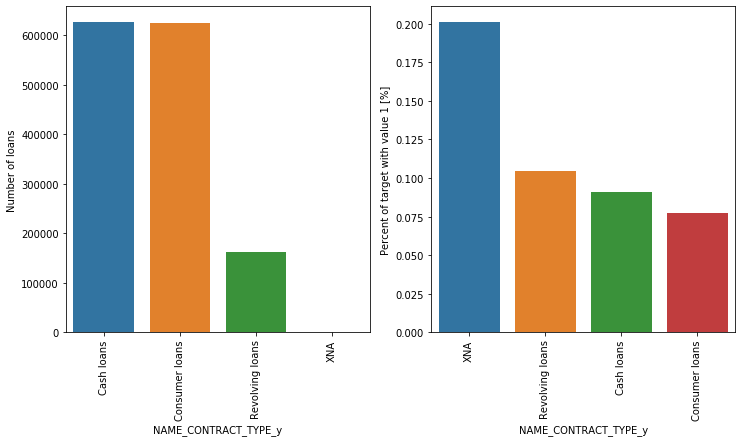

In [104]:
plot_p_stats('NAME_CONTRACT_TYPE_y',True,True)

In previous application data, Applicants equally go for either Cash Loans or Consumer Loans (approx. 620000).Revolving loans are taken by very few applicants (approx. 150000).

Ignoring XNA, Applicants are more likely to default in Revolving loans (approx 10%), though very less applicants go for Revolving loan, followd by Cash Loans and Consumer loans.

### 14.2 Purpose of the Loan

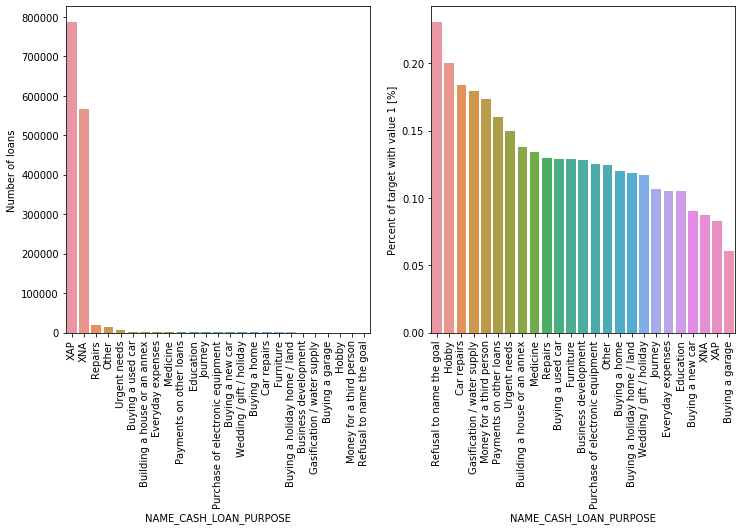

In [105]:
plot_p_stats('NAME_CASH_LOAN_PURPOSE', True, True)

Besides not identifed/not available categories, Repairs, Other, Urgent needs, Buying a used car, Building a house or an annex accounts have largest number of contracts. 

For percent of defaults for the applications, applicants with history of previous applications have largest percents of defaults are for Refusal to name the goal.

### 14.3 Contract status

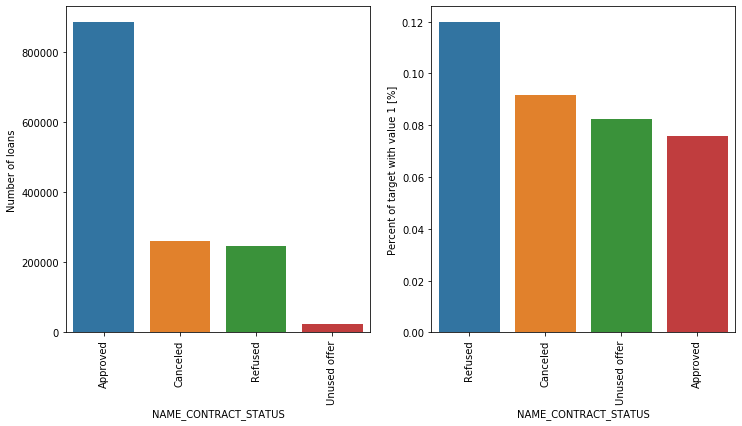

In [106]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

Most previous applications contract statuses are Approved (approx. 850K), followed by Canceled and Refused (approx. 240K). There are only approx. 20K in status Unused offer.

For current applications, applicants with history of previous applications have largest percentage of defaults when in their history contract statuses are Refused (12%), followed by Canceled (9%), Unused offer (approx. 8%) and Approved (lowest percent of defaults in current applictions, with less than 8%)

### 14.4 Payment Type of Loan

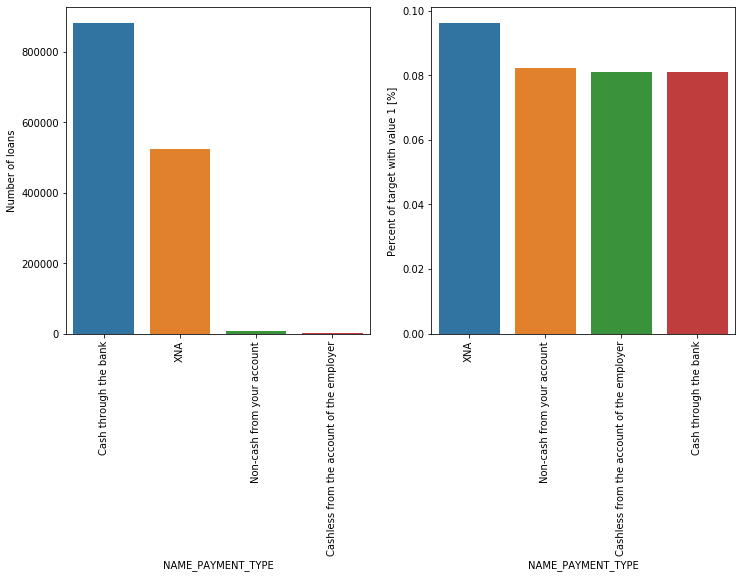

In [107]:
plot_p_stats('NAME_PAYMENT_TYPE', True, True)

For previous applications were paid with Cash through the bank (approx. 850K). Payments using Non-cash from your account or Cashless from the account of the employer are much rare. 

These three types of payments in previous applications results in almost the same percent of defaults for current applicants (approx. 8% each).

### 14.5 Client Type

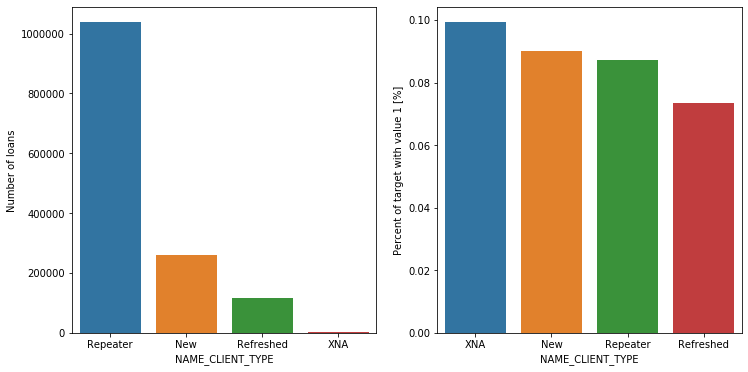

In [108]:
plot_p_stats('NAME_CLIENT_TYPE')

Most of the previous applications have client type Repeater (approx. 1M), just over 200K are New and approx. 100K are Refreshed.
In terms of default percent for current applications of clients with history of previous applications, current clients with previous applications have values of percent of defaults ranging from 8.5%, 8.25% and 7% corresponding to client types in the past New, Repeater and Refreshed, respectively.

## 15. Bivariate Analysis

In [109]:
Combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AGGREGATE_DOC_RESULT,IncomeSlab,Applicant_AgeGroup,Experience_Slab,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,25.92,1.75,5.81,1,Laborers,1,Business Entity Type 3,0,0,0.05,Low,20-30,0-10,1038818.00,Consumer loans,9251.77,179055.00,179055.00,179055.00,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,24,low_normal,POS other with interest,365243,565,125,25,17,0.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05,Low,40-50,0-10,1810518.00,Cash loans,98356.99,900000.00,1035882.00,900000.00,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,12,low_normal,Cash X-Sell: low,365243,716,386,536,527,1.00
2,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05,Low,40-50,0-10,2636178.00,Consumer loans,64567.67,337500.00,348637.50,337500.00,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,6,middle,POS industry with interest,365243,797,647,647,639,0.00
3,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,45.93,3.25,0.80,1,Core staff,2,School,0,0,0.05,Low,40-50,0-10,2396755.00,Consumer loans,6737.31,68809.50,68053.50,68809.50,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,12,middle,POS household with interest,365243,2310,1980,1980,1976,1.00
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,52.18,0.62,6.93,1,Laborers,1,Government,0,0,0.00,Low,50-60,0-10,1564014.00,Consumer loans,5357.25,24282.00,20106.00,24282.00,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,4,middle,POS mobile without interest,365243,784,694,724,714,0.00


## 15.1 Categorical- Categorical

### 15.1.1 Defaulters vs Refused

In [110]:
a0=Combined_df.loc[Combined_df["TARGET"]==0]
a1=Combined_df.loc[Combined_df["TARGET"]==1]

In [111]:
print(len(a0["NAME_CONTRACT_STATUS"]))
a2 = a0["NAME_CONTRACT_STATUS"].value_counts()
a2

1306720


Approved        818810
Canceled        235612
Refused         215935
Unused offer     20891
Name: NAME_CONTRACT_STATUS, dtype: int64

In [112]:
print(len(a1["NAME_CONTRACT_STATUS"]))
a3 = a1["NAME_CONTRACT_STATUS"].value_counts()
a3

123340


Approved        67243
Refused         29438
Canceled        23800
Unused offer     1879
Name: NAME_CONTRACT_STATUS, dtype: int64

In [113]:
percentageA0=a2["Refused"]/len(a0["NAME_CONTRACT_STATUS"])*100
percentageA1=a3["Refused"]/len(a1["NAME_CONTRACT_STATUS"])*100

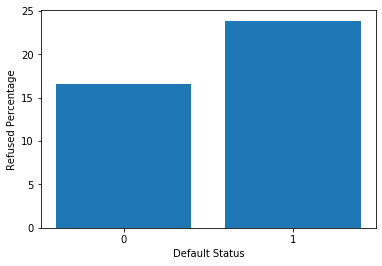

In [114]:
plt.bar(["0","1"], [percentageA0, percentageA1])
plt.xlabel("Default Status")
plt.ylabel("Refused Percentage")
plt.show()

The applicants who do more defaults in paying the loan amount in past, are more likely to get refused for future loans.

## 15.2 Categorical vs Continuous

### 15.2.1 Days Last Due vs People who more likely to default

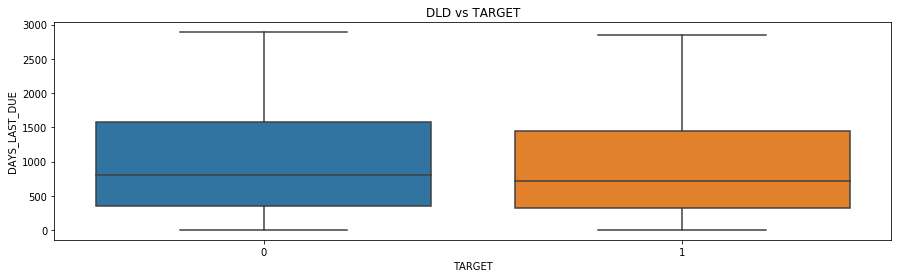

In [115]:
plt.figure(figsize=[15,4])
sns.boxplot(y = Combined_df[Combined_df['DAYS_LAST_DUE']<150000].DAYS_LAST_DUE, x='TARGET', data= Combined_df)
plt.title("DLD vs TARGET")
plt.show()

There is not much difference in the Last due days for the applicants who give their loan on time and who default their loans.
The Days last due for defaulters are comparatively lesser than the applicants not defaulting the loan. 

## 15.3 Categorical vs Categorical

### 15.3.1 Channel Type vs Contract Status

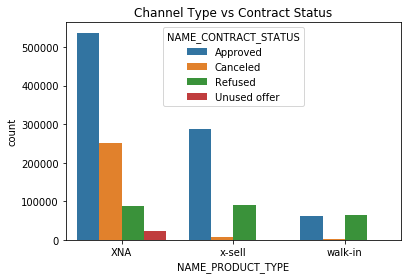

In [116]:
sns.countplot(x = 'NAME_PRODUCT_TYPE', hue='NAME_CONTRACT_STATUS', data= Combined_df)
plt.title("Channel Type vs Contract Status")
plt.show()

Excluding XNA, the loans are more approved for x-sell than for walking. (x-sell means selling the product to the existing customers, hence the trust factor is  more so more chances of the loan to get approved.)/

### 15.3.2 Client Type vs Contract Status

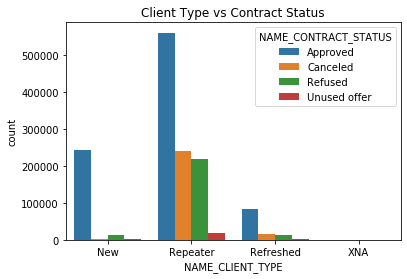

In [117]:
sns.countplot(x = 'NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', data= Combined_df)
plt.title("Client Type vs Contract Status")
plt.show()

The applicants who already are the customers of the bank, the loan approval rate is the highest for them than the new customers.

### 15.3.3 Reason of Rejection vs contract type

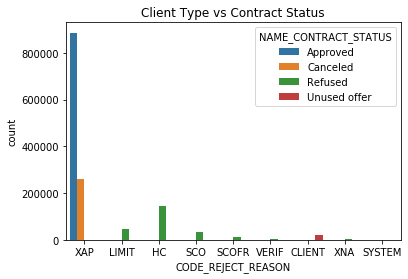

In [118]:
sns.countplot(x = 'CODE_REJECT_REASON', hue='NAME_CONTRACT_STATUS', data= Combined_df)
plt.title("Client Type vs Contract Status")
plt.show()

Excluding XNA, the highest reason to reject is the loan is HC. followed by Limit.